Basically what we are doing here is the classification of gamma or hedron particles using supervised learning

In [10]:
!pip install imblearn


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [12]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data",names=cols)
df.head() #gives the first five things as defaul and u can also input n as ur input for how many lines u want

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


converts the g and h to numbers

In [13]:
df["class"] = (df["class"] == "g").astype(int)

In [14]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


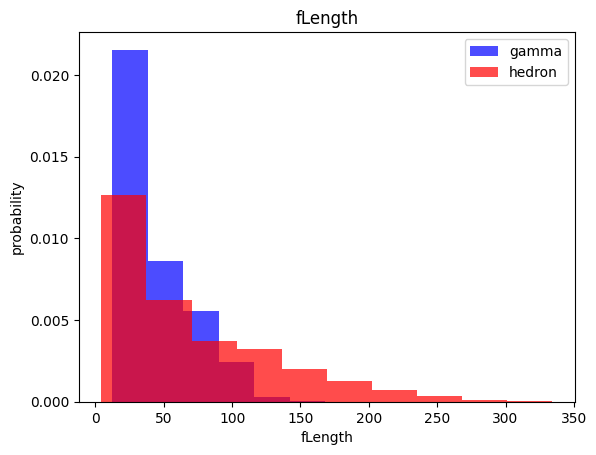

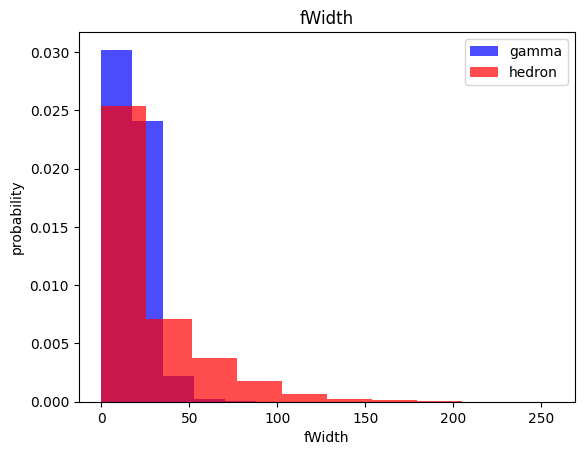

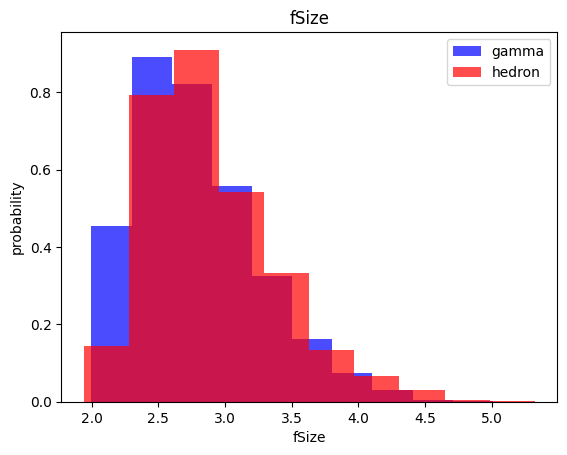

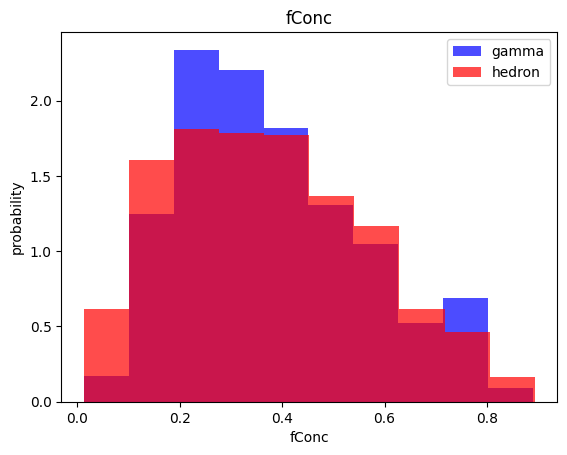

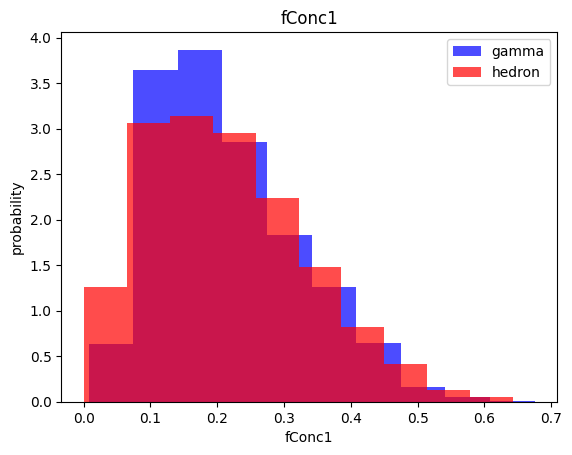

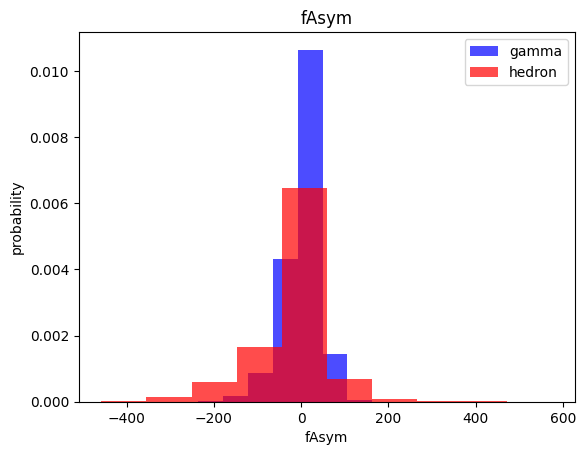

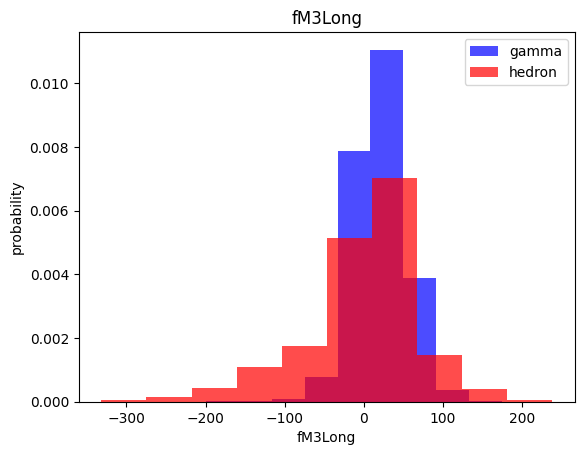

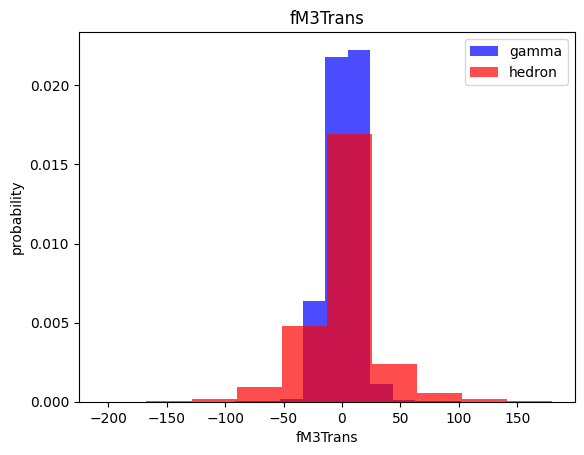

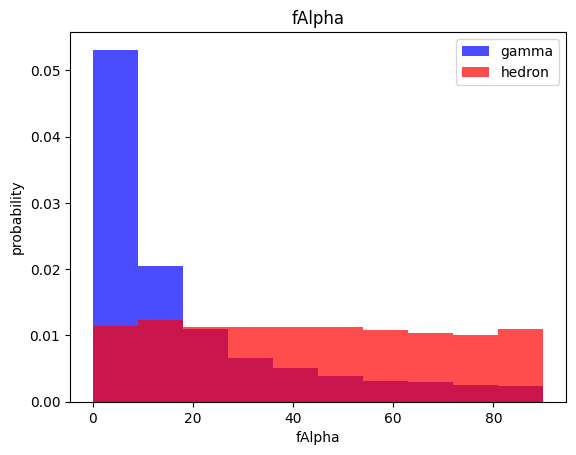

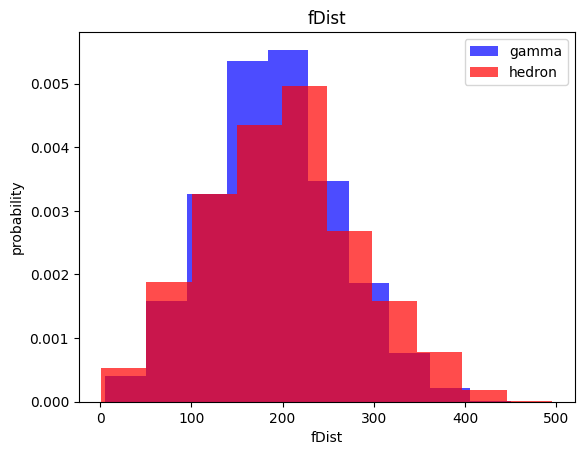

In [15]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue",label = 'gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label], color = "red",label = 'hedron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation and test datasets

In [16]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) #this means that from 60% to 80% of the data frame it will go to validation dataset

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


In [18]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5) #how many neighbours we want
knn_model.fit(X_train,y_train) #passing the training datasets

KNeighborsClassifier()

In [21]:
Y_pred = knn_model.predict(X_test)


In [22]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1342
           1       0.86      0.87      0.86      2462

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



# naive bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [25]:
Y_pred = nb_model.predict(X_test)

In [26]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1342
           1       0.73      0.90      0.81      2462

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic regression


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [29]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1342
           1       0.85      0.83      0.84      2462

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



# Support vector machines


In [30]:
from sklearn.svm import SVC

In [31]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [32]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1342
           1       0.89      0.91      0.90      2462

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Networks

In [33]:
import tensorflow as tf

In [34]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [35]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob), #drop training for certain neuron to stop overfitting
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid") #output node
]) #stack linearly

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss="binary_crossentropy",metrics=["accuracy"])

# Training:

  history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2) # put "verbose=0" if printing something is annoying

  return nn_model,history

In [36]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7883 - loss: 0.4523 - val_accuracy: 0.6919 - val_loss: 0.6436
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.3495 - val_accuracy: 0.7710 - val_loss: 0.4538
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.3307 - val_accuracy: 0.7889 - val_loss: 0.4284
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.3271 - val_accuracy: 0.7424 - val_loss: 0.5138
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.3106 - val_accuracy: 0.7262 - val_loss: 0.5362
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.3307 - val_accuracy: 0.7543 - val_loss: 0.4198
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.3137 - val_accuracy: 0.7845 - val_loss: 0.4337
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3099 - val_accu

KeyboardInterrupt: 

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))
